In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from math import sqrt

# CONFIDENCE INTERVALS

# answer1

In [6]:
#sample size n = 130
#sample mean = 98.25
#std = 0.73
# confidence interval % 99

In [7]:
st_dev = 0.73
n = 130
ci = 0.99
sample_mean = 98.25

sem = st_dev / np.sqrt(n)

#Find the confidence interval according to z distribution with probability .99
ci_z = stats.norm.interval(ci, sample_mean, sem)
display(f"Confidence interval according to z distribution with probability .99 is: {ci_z}")

#Find the confidence interval according to t distribution with probability .99
ci_t = stats.t.interval(ci,
                        n-1,
                        loc=sample_mean,
                        scale=sem)
display(f"Confidence interval according to z distribution with probability .99 is: {ci_t}")



'Confidence interval according to z distribution with probability .99 is: (98.08508192246582, 98.41491807753418)'

'Confidence interval according to z distribution with probability .99 is: (98.08260738705933, 98.41739261294067)'

# answer2

In [8]:
#sample size n = 500
#sample mean = 5.4
#std = 3.1
# confidence interval % 95

In [9]:
st_dev = 3.1
n = 500
ci = 0.95
sample_mean = 5.4

sem = st_dev / np.sqrt(n)

#Find the confidence interval according to z distribution with probability .95
ci_z = stats.norm.interval(ci, sample_mean, sem)
display(f"Confidence interval according to z distribution with probability .95 is: {ci_z}")

#Find the confidence interval according to t distribution with probability .95
ci_t = stats.t.interval(ci,
                        n-1,
                        loc=sample_mean,
                        scale=sem)
display(f"Confidence interval according to z distribution with probability .95 is: {ci_t}")

'Confidence interval according to z distribution with probability .95 is: (5.12827801242126, 5.67172198757874)'

'Confidence interval according to z distribution with probability .95 is: (5.127617354510309, 5.672382645489692)'

# HYPOTHESIS TESTING

# answer3

In [10]:
# sample size n = 40
# sample mean = 12.2
# population_std = 2.5
# population_mean = 13.2
# alpha = 0.01
#H0: mu = 12.2
#HA: mu < 12.2

In [11]:
x_bar = 12.2 # sample mean
n = 40 # number of workers
sigma = 2.5 #  population_std
mu = 13.2 # Population mean
alpha = 0.01

In [13]:
z = (x_bar - mu)/(sigma/sqrt(n))
z

-2.5298221281347035

In [14]:
p_value = stats.norm.cdf(z)
p_value

0.005706018193000824

In [15]:


if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.01 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.


In [17]:
# second way

t_test = (x_bar - mu)/(sigma/sqrt(n))
t_test


-2.5298221281347035

In [19]:
p_value = stats.t.cdf(t_test, n-1)
p_value

0.0077816812266594355

In [20]:
if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.01 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.


# answer4

In [21]:
import pandas as pd
soil = pd.read_excel("soil.xlsx")
soil

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371
5,1.641,1.428
6,1.499,1.119
7,1.347,1.373
8,1.685,1.589
9,1.578,1.714


In [22]:
#H0: mu_soil1 - mu_soil2 = 0
#HA: mu_soil1 - mu_soil2 != 0
#!pip install pingouin
#from pingouin import ttest
alpha = 0.01

In [29]:
from pingouin import ttest
ttest(soil['Soil1'], soil['Soil2'], correction = "False", confidence=0.99)

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,5.168147,63,two-sided,0.000003,"[0.1335122825148328, 0.4158591460565965]",1.28587,5688.865,0.99912


In [24]:
p_val = ttest(soil['Soil1'], soil['Soil2'], correction = False)["p-val"].values

if p_val < alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.01 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.


In [ ]:
#second way

In [26]:
leveneTest = stats.levene(soil['Soil1'][:30], soil['Soil2'])
leveneTest

LeveneResult(statistic=0.31486292982090475, pvalue=0.5767018253541134)

In [31]:
ind_test = stats.ttest_ind(soil['Soil1'][:30], soil['Soil2'], equal_var = True)
ind_test

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.59322873235282e-06)

In [32]:
if ind_test.pvalue < alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.01 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.


# answer5

In [33]:
pisa = pd.read_excel("2015 PISA Test.xlsx")
pisa

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
67,URY,SA,64.600000,417.9919,436.5721,435.3630
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [34]:
pisa.groupby("Continent_Code").describe().T

Continent_Code                        AF          AS          EU          OC  \
internet_users_per_100 count    2.000000   17.000000   37.000000    2.000000   
                       mean    43.359918   68.455613   77.274888   86.391704   
                       std      7.297226   21.086060   12.425773    2.589686   
                       min     38.200000   21.976068   53.744979   84.560519   
                       25%     40.779959   50.300000   68.632900   85.476112   
                       50%     43.359918   74.000000   76.184000   86.391704   
                       75%     45.939877   84.948353   87.479056   87.307296   
                       max     48.519836   92.884826   98.200000   88.222889   
Math                   count    2.000000   17.000000   37.000000    2.000000   
                       mean   363.212100  466.216647  477.981449  494.559750   
                       std      5.099513   64.356490   35.150403    0.938401   
                       min    359.606200  380.259000  371.311400  493.896200   
                       25%    361.409150  403.833200  464.040100  494.227975   
                       50%    363.212100  459.816000  489.728700  494.559750   
                       75%    365.015050  531.296100  503.722000  494.891525   
                       max    366.818000  564.189700  521.250600  495.223300   
Reading                count    2.000000   17.000000   37.000000    2.000000   
                       mean   355.457400  454.059682  476.164608  506.085650   
                       std      7.916909   57.048962   37.720545    4.504341   
                       min    349.859300  346.549000  351.741500  502.900600   
                       25%    352.658350  408.102200  452.514300  504.493125   
                       50%    355.457400  433.542300  487.250100  506.085650   
                       75%    358.256450  508.690500  499.814600  507.678175   
                       max    361.055500  535.100200  526.424700  509.270700   
Science                count    2.000000   17.000000   37.000000    2.000000   
                       mean   381.074250  467.945847  478.299381  511.648700   
                       std      7.536556   56.671371   34.450616    2.340241   
                       min    375.745100  386.485400  383.682400  509.993900   
                       25%    378.409675  417.611200  460.774900  510.821300   
                       50%    381.074250  456.483600  490.225000  511.648700   
                       75%    383.738825  523.277400  501.936900  512.476100   
                       max    386.403400  555.574700  534.193700  513.303500   

Continent_Code                        SA  
internet_users_per_100 count    7.000000  
                       mean    60.180494  
                       std      9.772455  
                       min     40.900000  
                       25%     57.116462  
                       50%     64.289000  
                       75%     66.321532  
                       max     69.198471  
Math                   count    7.000000  
                       mean   402.887700  
                       std     18.128894  
                       min    377.069500  
                       25%    388.102200  
                       50%    409.033300  
                       75%    417.617650  
                       max    422.671400  
Reading                count    7.000000  
                       mean   425.359229  
                       std     19.709688  
                       min    397.541400  
                       25%    416.126900  
                       50%    425.303100  
                       75%    431.922700  
                       max    458.570900  
Science                count    7.000000  
                       mean   421.747186  
                       std     18.470319  
                       min    396.683600  
                       25%    408.205450  
                       50%    424.590500  
                       75%

In [35]:
ttest(pisa[pisa["Continent_Code"]== "EU"]["Math"], pisa[pisa["Continent_Code"]== "AS"]["Math"], correction = False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.870055,52,two-sided,0.388269,"[-15.37, 38.9]",0.254929,0.395,0.136832


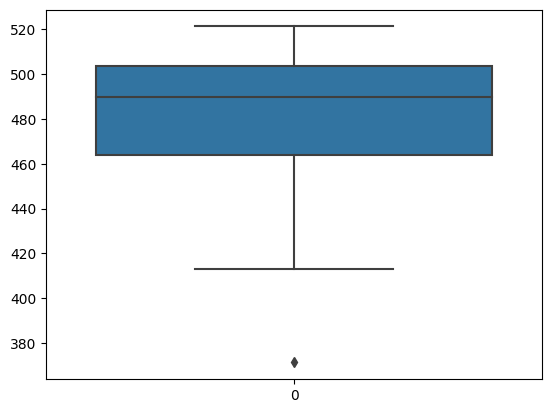

In [36]:
sns.boxplot(pisa[pisa["Continent_Code"]== "EU"]["Math"])
plt.show()



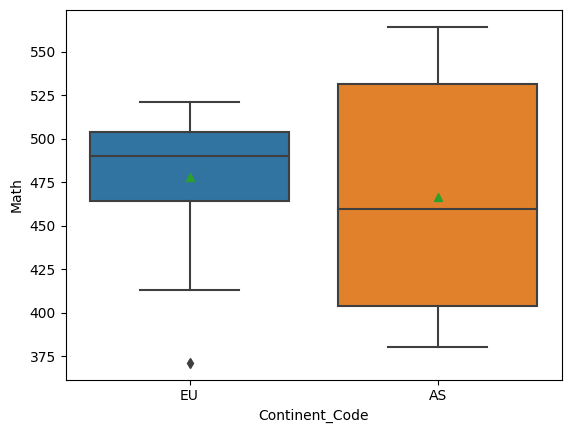

In [37]:
sns.boxplot(x="Continent_Code", y = "Math", data=pisa[(pisa["Continent_Code"] =="EU") | (pisa["Continent_Code"] =="AS")], showmeans = True);

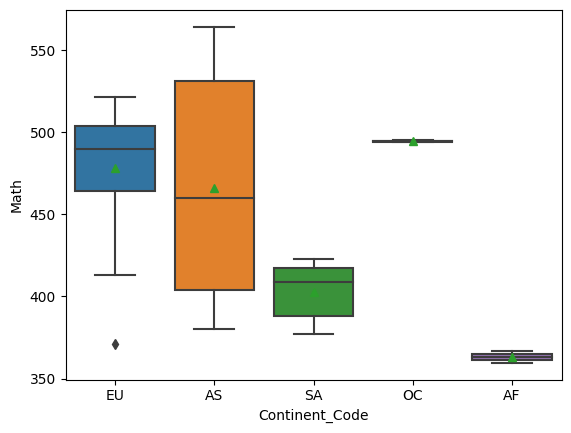

In [38]:
sns.boxplot(x="Continent_Code", y = "Math", data=pisa, showmeans = True);


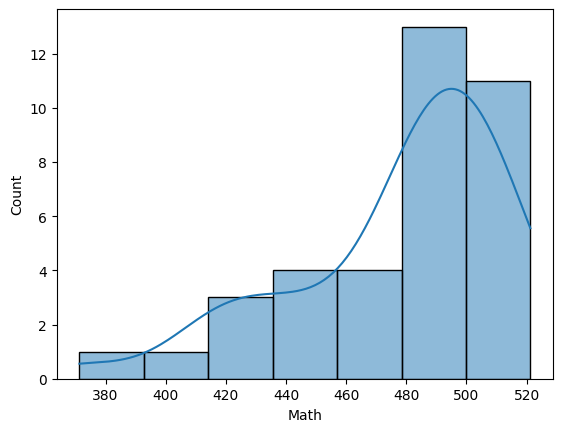

In [39]:
sns.histplot(pisa[pisa["Continent_Code"] =="EU"]["Math"], kde =True);

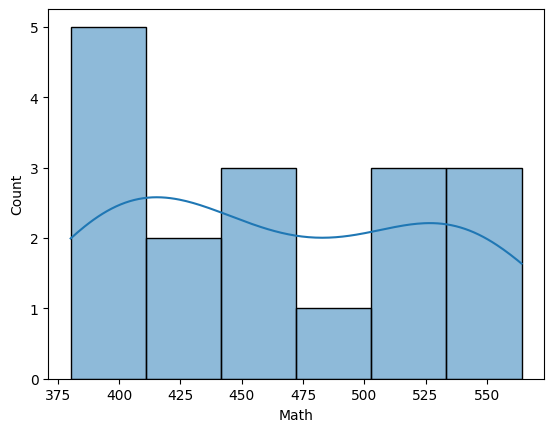

In [40]:
sns.histplot(pisa[pisa["Continent_Code"] =="AS"]["Math"], kde =True);

In [41]:
#H0: mu_EU - mu_AS = 0
#HA: mu_EU - mu_AS != 0

alpha = 0.05

In [42]:
ind_test = stats.ttest_ind(pisa[pisa["Continent_Code"] =="AS"]["Math"], pisa[pisa["Continent_Code"] =="EU"]["Math"], \
                           equal_var = True)
ind_test

Ttest_indResult(statistic=-0.8700553179679789, pvalue=0.38826888111307556)

In [43]:
if ind_test.pvalue < alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.05 level of significance, we fail to reject the null hypothesis.


In [47]:
#second way 
ttest(pisa[pisa["Continent_Code"] =="AS"]["Math"], pisa[pisa["Continent_Code"] =="EU"]["Math"],\
      correction = "False", confidence=0.95)



,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.870055,52,two-sided,0.388269,"[-38.9, 15.37]",0.254929,0.395,0.136832


In [ ]:
# At 0.05 level of significance, we fail to reject the null hypothesis.